<font color='tomato'><font color="#CC3D3D"><p>
# 실습-02: 머신러닝 맛보기 with sklearn

In [1]:
import pandas as pd
import warnings; warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.8/dist-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
train = pd.read_csv('titanic_train.csv', encoding='cp949')
train

,승객ID,생존여부,객실등급,성별,나이,동반_형제자매배우자,동반_부모자식,티켓가격,이름,티켓번호,객실번호,탑승항구
0,1,0,3,남자,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",A/5 21171,NaN,S
1,2,1,1,여자,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,C
2,3,1,3,여자,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,S
3,4,1,1,여자,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,S
4,5,0,3,남자,35.0,0,0,8.0500,"Allen, Mr. William Henry",373450,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,남자,27.0,0,0,13.0000,"Montvila, Rev. Juozas",211536,NaN,S
887,888,1,1,여자,19.0,0,0,30.0000,"Graham, Miss. Margaret Edith",112053,B42,S
888,889,0,3,여자,NaN,1,2,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN,S
889,890,1,1,남자,26.0,0,0,30.0000,"Behr, Mr. Karl Howell",111369,C148,C


*scikit-learn은 class(y)와 feature(X)로 데이터의 열이 구분되어야 한다.*

In [3]:
y_train = train.생존여부
X_train = train[['객실등급', '성별', '동반_형제자매배우자', '동반_부모자식', '티켓가격', '나이']]
X_train

,객실등급,성별,동반_형제자매배우자,동반_부모자식,티켓가격,나이
0,3,남자,1,0,7.2500,22.0
1,1,여자,1,0,71.2833,38.0
2,3,여자,0,0,7.9250,26.0
3,1,여자,1,0,53.1000,35.0
4,3,남자,0,0,8.0500,35.0
...,...,...,...,...,...,...
886,2,남자,0,0,13.0000,27.0
887,1,여자,0,0,30.0000,19.0
888,3,여자,1,2,23.4500,NaN
889,1,남자,0,0,30.0000,26.0


*모든 feature는 숫자이어야 한다.*

In [4]:
X_train.성별 = X_train.성별.map({'여자':0, '남자':1})

In [5]:
X_train

,객실등급,성별,동반_형제자매배우자,동반_부모자식,티켓가격,나이
0,3,1,1,0,7.2500,22.0
1,1,0,1,0,71.2833,38.0
2,3,0,0,0,7.9250,26.0
3,1,0,1,0,53.1000,35.0
4,3,1,0,0,8.0500,35.0
...,...,...,...,...,...,...
886,2,1,0,0,13.0000,27.0
887,1,0,0,0,30.0000,19.0
888,3,0,1,2,23.4500,NaN
889,1,1,0,0,30.0000,26.0


*모든 feature에는 결측값(NaN)이 없어야 한다.*

In [6]:
X_train.나이 = X_train.나이.fillna(X_train.나이.mean())
X_train

,객실등급,성별,동반_형제자매배우자,동반_부모자식,티켓가격,나이
0,3,1,1,0,7.2500,22.000000
1,1,0,1,0,71.2833,38.000000
2,3,0,0,0,7.9250,26.000000
3,1,0,1,0,53.1000,35.000000
4,3,1,0,0,8.0500,35.000000
...,...,...,...,...,...,...
886,2,1,0,0,13.0000,27.000000
887,1,0,0,0,30.0000,19.000000
888,3,0,1,2,23.4500,29.699118
889,1,1,0,0,30.0000,26.000000


#### 모형 생성 - 의사결정나무(Decision Tree)
<img align="left" src='http://drive.google.com/uc?export=view&id=1OZmnohHM8_932fiNnokTRdC6ZQumrPeL'/>

In [7]:
# 1) 사용하려는 분류기를 import 한다.
from sklearn.tree import DecisionTreeClassifier

# 2) 분류기 생성한다. 이때 적절한 하이퍼 파라미터를 지정한다.
model = DecisionTreeClassifier(random_state=0)

# 3) 생성된 분류기를 가지고 학습한다. 즉 머신러닝 모형을 만든다.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

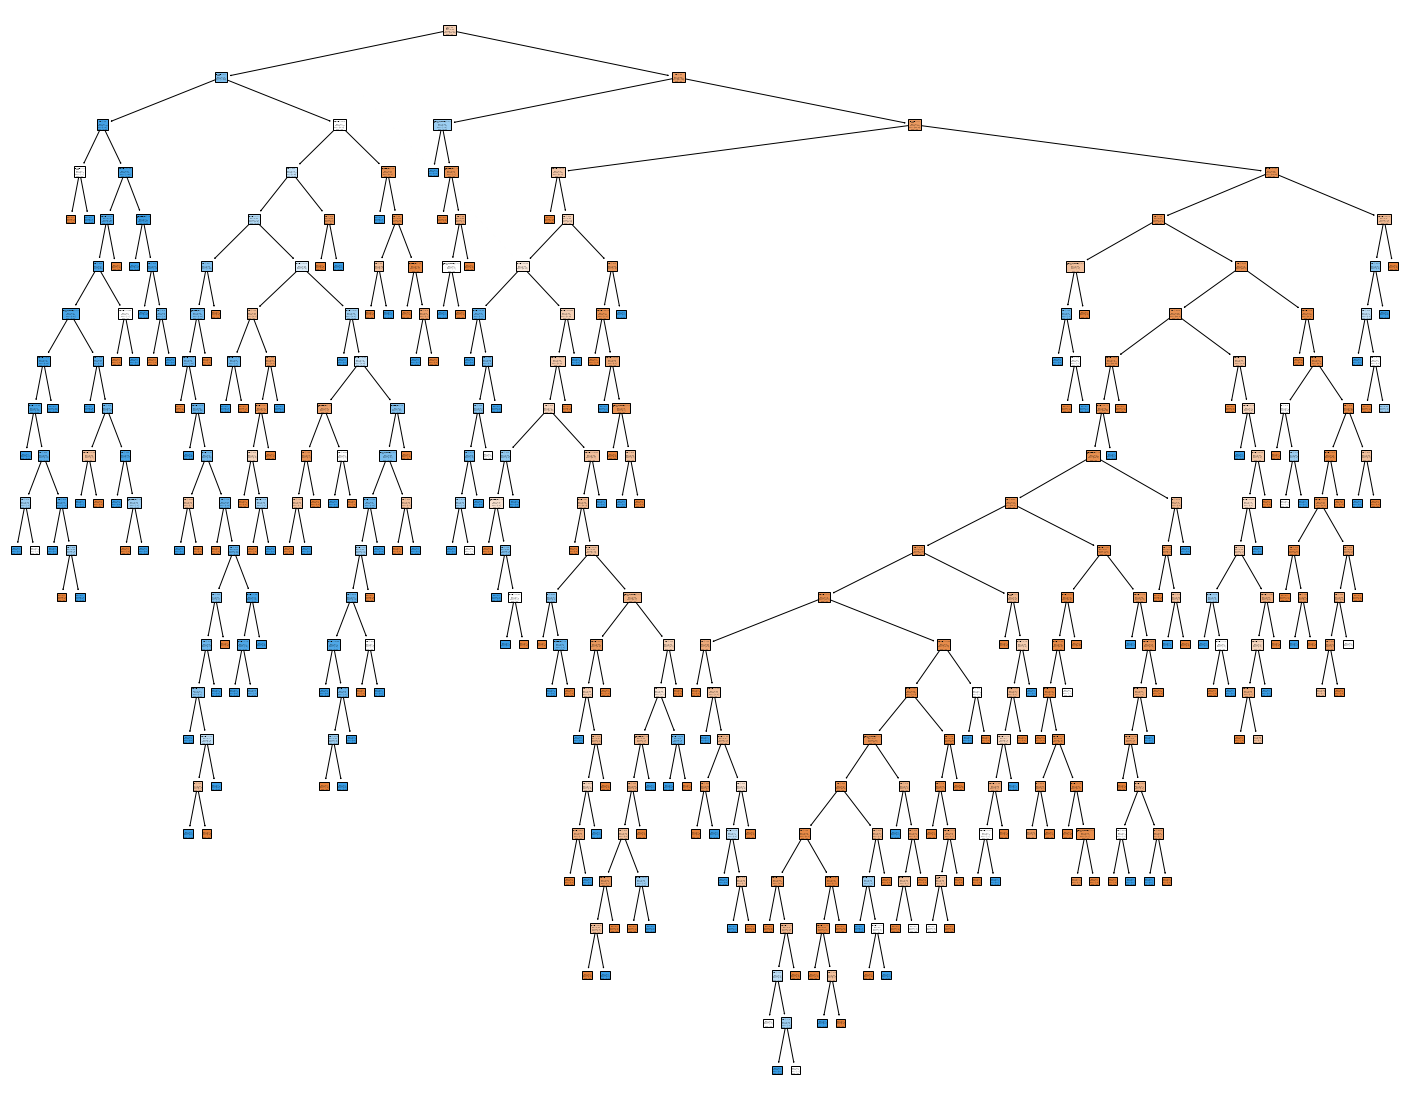

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import matplotlib_hangul

plt.figure(figsize=(25,20))
plot_tree(model, filled=True, class_names=['die', 'survive'], feature_names=X_train.columns)
plt.show()

#### 모형 평가

In [9]:
# 학습 데이터를 가지고 모형을 평가(검증)하지는 않는다.
model.score(X_train, y_train)

0.9820426487093153

In [10]:
# 모형 검증: 평가 데이터를 가지고 한다.
test = pd.read_csv('titanic_test.csv', encoding='cp949')
test

,승객ID,생존여부,객실등급,성별,나이,동반_형제자매배우자,동반_부모자식,티켓가격,이름,티켓번호,객실번호,탑승항구
0,892,0,3,남자,NaN,0,0,14.4583,"Yousseff, Mr. Gerious",2627,NaN,C
1,893,0,3,남자,NaN,0,0,7.5500,"Willey, Mr. Edward",S.O./P.P. 751,NaN,S
2,894,0,3,남자,7.0,4,1,29.1250,"Rice, Master. Eric",382652,NaN,Q
3,895,1,1,여자,NaN,1,0,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",PC 17569,B78,C
4,896,1,3,여자,29.0,0,2,15.2458,"Touma, Mrs. Darwis (Hanne Youssef Razi)",2650,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
352,1244,0,3,남자,35.0,0,0,7.0500,"Asim, Mr. Adola",SOTON/O.Q. 3101310,NaN,S
353,1245,0,3,남자,51.0,0,0,7.7500,"Widegren, Mr. Carl/Charles Peter",347064,NaN,S
354,1246,1,2,여자,27.0,1,0,13.8583,"Duran y More, Miss. Asuncion",SC/PARIS 2149,NaN,C
355,1247,0,3,남자,33.0,0,0,7.8958,"Markun, Mr. Johann",349257,NaN,S


In [11]:
# 학습 데이터와 동일한 처리를 해야 함
y_test = test.생존여부
X_test = test[['객실등급', '성별', '동반_형제자매배우자', '동반_부모자식', '티켓가격', '나이']]
X_test.성별 = X_test.성별.map({'여자':0, '남자':1})
X_test.나이 = X_test.나이.fillna(X_test.나이.mean())

model.score(X_test, y_test)

0.9663865546218487

<font color='tomato'><font color="#CC3D3D"><p>
# End